In [96]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline

# Reading data

In [143]:
#read csv
bs_df = pd.read_csv('Basketball.csv')

In [144]:
#Check datafram with head and tail
bs_df.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [145]:
#Check data types, column names and Non null values
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


# Cleaning Data

In [147]:
#Check for null values 
bs_df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [148]:
#From the data few columns can be of data type int for easier analysis
pd.to_numeric(bs_df['Score'])

ValueError: Unable to parse string "-" at position 60

In [149]:
#Looks like we have '-' values instead of null values, replace it with 0
df=bs_df.replace('-','0')

In [150]:
df.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,0,0,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,0,0,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955-56,15
60,Team 61,1,0,0,0,0,0,0,0,0,0,2017~18,9


In [151]:
#get subset of df where score is not 0 (when score is 0, team has no record to analyze hence out of contention)
mydf = df[df['PlayedGames'] != '0']
#TeamLaunch year can be cleaned more to be an useful data
mydf['LaunchYear'] = mydf.TeamLaunch.apply(lambda x: x[0:4])

c:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [154]:
mydf.count()

Team                   60
Tournament             60
Score                  60
PlayedGames            60
WonGames               60
DrawnGames             60
LostGames              60
BasketScored           60
BasketGiven            60
TournamentChampion     60
Runner-up              60
TeamLaunch             60
HighestPositionHeld    60
LaunchYear             60
dtype: int64

In [155]:
#change column data types to int where possible and required
mydf['Score'] =mydf['Score'].astype(str).astype(int)
mydf['PlayedGames'] =mydf['PlayedGames'].astype(str).astype(int)
mydf['WonGames'] =mydf['WonGames'].astype(str).astype(int)
mydf['LostGames'] =mydf['LostGames'].astype(str).astype(int)
mydf['DrawnGames'] =mydf['DrawnGames'].astype(str).astype(int)
mydf['BasketScored'] =mydf['BasketScored'].astype(str).astype(int)
mydf['BasketGiven'] =mydf['BasketGiven'].astype(str).astype(int)
mydf['TournamentChampion'] =mydf['TournamentChampion'].astype(str).astype(int)
mydf['Runner-up'] =mydf['Runner-up'].astype(str).astype(int)
mydf['LaunchYear'] =mydf['LaunchYear'].astype(str).astype(int)

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
#team names for easy visualization
mydf['TeamName'] = mydf.Team.apply(lambda x: x[4:len(x)])

# Perform EDA

# 1. Univariant EDA 

In [169]:
#Find winning % of each team
wonPercentage = (mydf['WonGames']/mydf['PlayedGames'])*100
mydf['WinPercentage'] = wonPercentage

c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [170]:
#defence record of each team
defence = mydf['BasketGiven']/mydf['PlayedGames']
mydf['defenceFactor'] = defence

c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [156]:
mydf.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,HighestPositionHeld,LaunchYear
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,1.45000,1.433333,7.050000,1957.950000
std,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,5.51554,4.574679,5.315232,26.646732
min,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,0.00000,0.000000,1.000000,1929.000000
25%,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,0.00000,0.000000,3.000000,1934.750000
50%,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,0.00000,0.000000,6.000000,1950.500000
75%,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,0.00000,0.000000,10.000000,1977.250000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.00000,25.000000,20.000000,2016.000000


c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

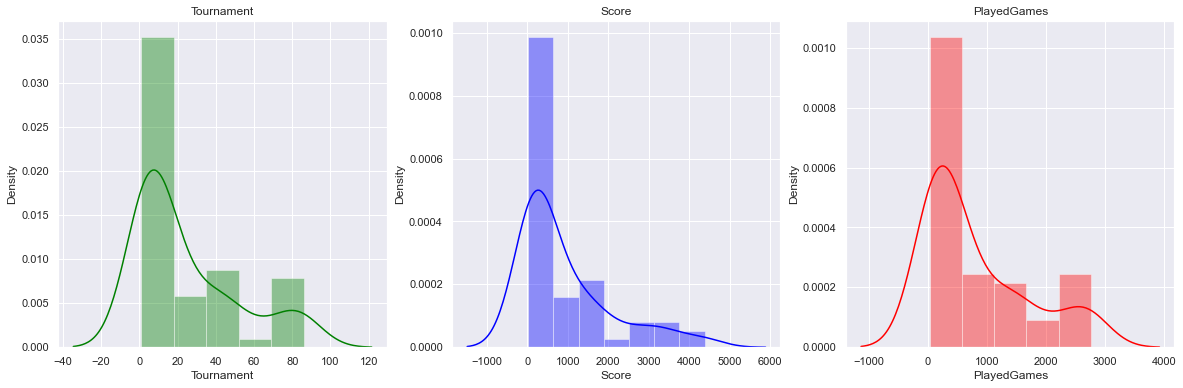

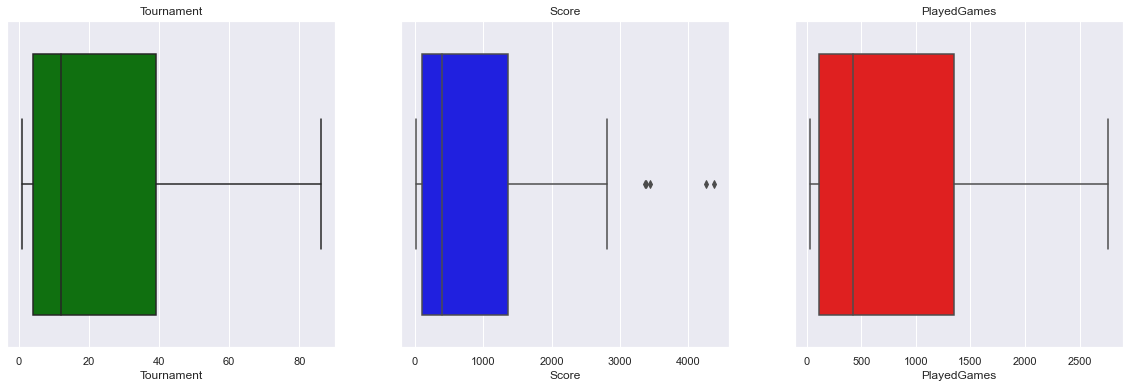

In [167]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Tournament')
sns.distplot(mydf['Tournament'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Score')
sns.distplot(mydf['Score'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('PlayedGames')
sns.distplot(mydf['PlayedGames'],color='red')


plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Tournament')
sns.boxplot(mydf['Tournament'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Score')
sns.boxplot(mydf['Score'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('PlayedGames')
sns.boxplot(mydf['PlayedGames'],orient='vertical',color='red')

plt.show()

### From above analysis about number of tournaments played, score and gamesplayed, it can be deduced than top teams in the data(i.e. Team 1,Team 2, Team 3, etc.) are the teams who have played most tournaments, scored the most and played more games than other teams. Scores have few outliers above upper fence, they are mostly the top teams.

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

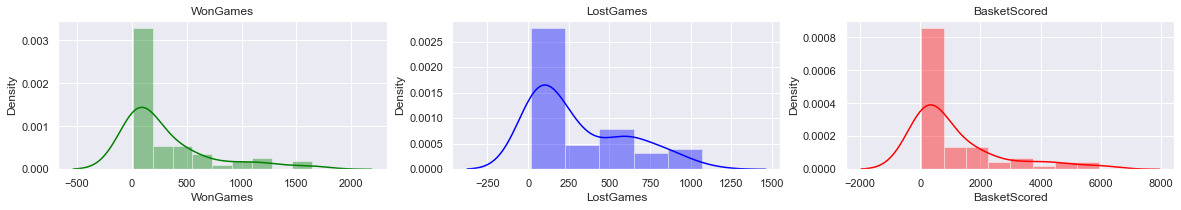

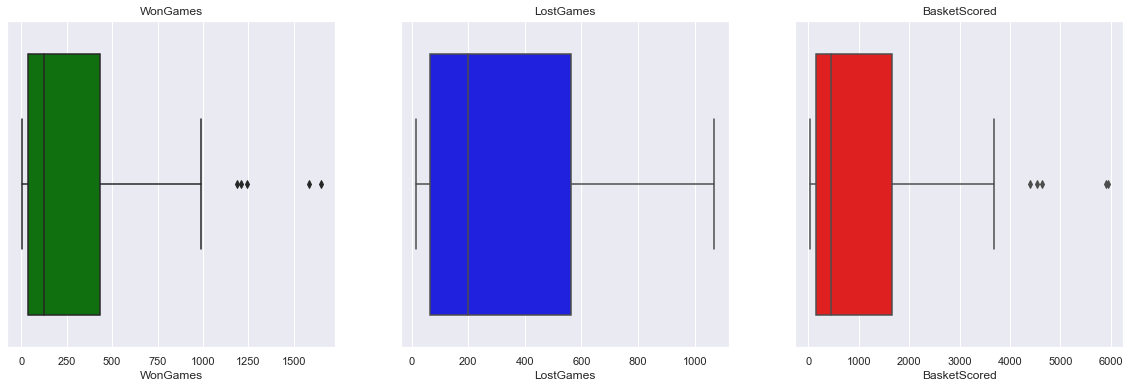

In [164]:
plt.figure(figsize=(20,6))
plt.subplot(2, 3, 1)
plt.title('WonGames')
sns.distplot(mydf['WonGames'],color='green')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('LostGames')
sns.distplot(mydf['LostGames'],color='blue')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('BasketScored')
sns.distplot(mydf['BasketScored'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('WonGames')
sns.boxplot(mydf['WonGames'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('LostGames')
sns.boxplot(mydf['LostGames'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('BasketScored')
sns.boxplot(mydf['BasketScored'],orient='vertical',color='red')

plt.show()

### From previous analysis, we know that top teams who have played the most games. Therefore, its fair to say and from this analysis too, that top teams have won more games, lost more games and have scored most baskets. WonGames and BasketScored have few outliers. Similarly like before, top team must be these outliers as they are on top they won and scored more.

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

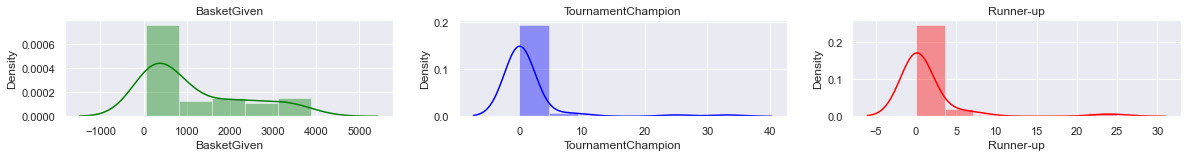

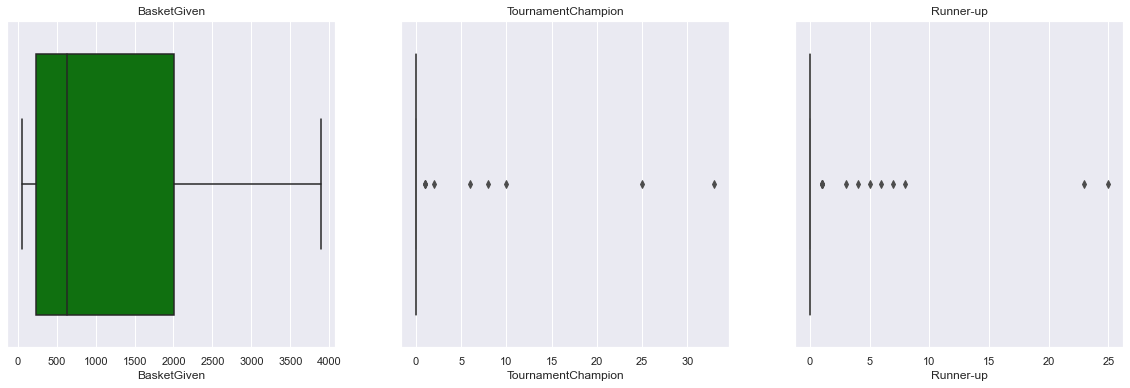

In [168]:
# subplot 3
plt.figure(figsize=(20,6))
plt.subplot(3, 3, 1)
plt.title('BasketGiven')
sns.distplot(mydf['BasketGiven'],color='green')

# subplot 3
plt.subplot(3, 3, 2)
plt.title('TournamentChampion')
sns.distplot(mydf['TournamentChampion'],color='blue')

# subplot 3
plt.subplot(3, 3, 3)
plt.title('Runner-up')
sns.distplot(mydf['Runner-up'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('BasketGiven')
sns.boxplot(mydf['BasketGiven'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('TournamentChampion')
sns.boxplot(mydf['TournamentChampion'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('Runner-up')
sns.boxplot(mydf['Runner-up'],orient='vertical',color='red')


plt.show()

###  From previous analysis, we know that top teams who have played the most games. Therefore, its fair to say and from this analysis too we can say that top teams have played more games. therefore given more baskets and been to more finals than other teams. There are only few teans who have reached finals and most of them are at the top and those we can see as outliers.

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\python\lib

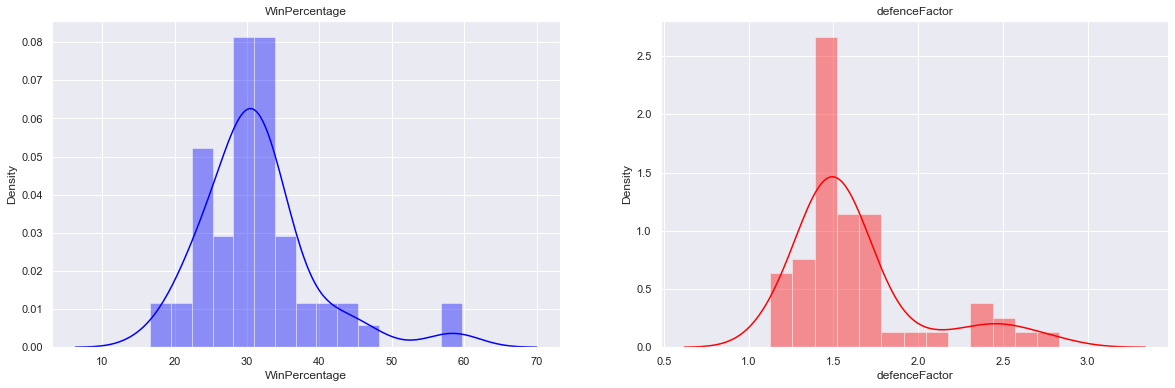

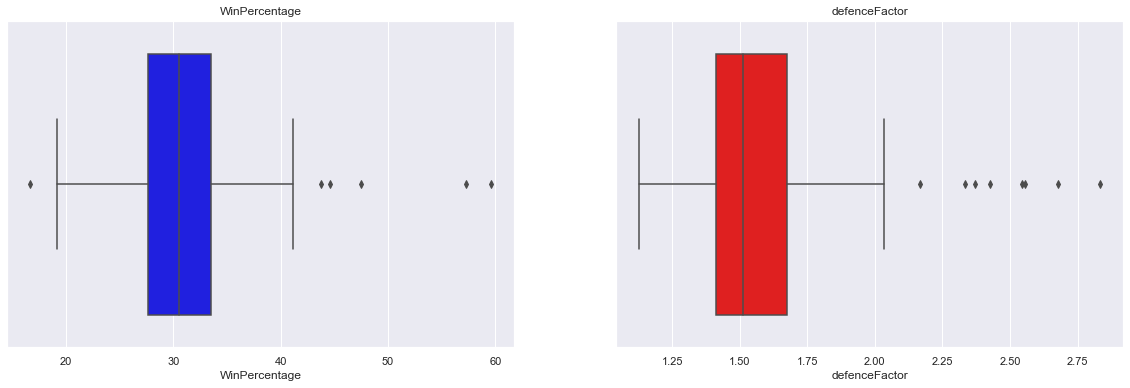

In [174]:
# subplot 3
plt.figure(figsize=(20,6))
# subplot 3
plt.subplot(1, 2, 1)
plt.title('WinPercentage')
sns.distplot(mydf['WinPercentage'],color='blue')

# subplot 3
plt.subplot(1, 2, 2)
plt.title('defenceFactor')
sns.distplot(mydf['defenceFactor'],color='red')

plt.figure(figsize=(20,6))
# subplot 2
plt.subplot(1, 2, 1)
plt.title('WinPercentage')
sns.boxplot(mydf['WinPercentage'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 2, 2)
plt.title('defenceFactor')
sns.boxplot(mydf['defenceFactor'],orient='vertical',color='red')

plt.show()

### Win% and defence factor are 2 important data driven column deduced. It say about the winning % of teams(wongames/playedgames) and defence factor(baskets given every game). Teams with more win % and less defence factor. So outliers above upper fence for defence factor are not good with defence and outliers for win % either suggest they are very good at winning(upper fence outliers) or they are losing more than winning(lower fence outliers).

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\python\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


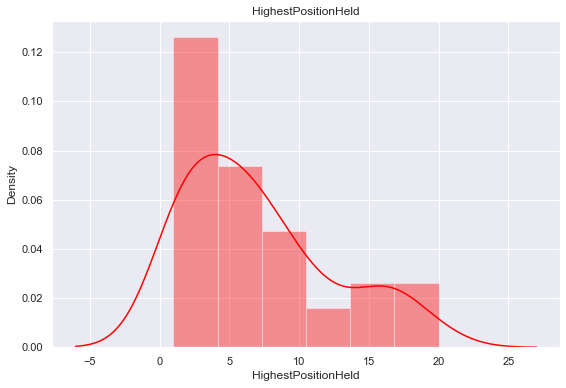

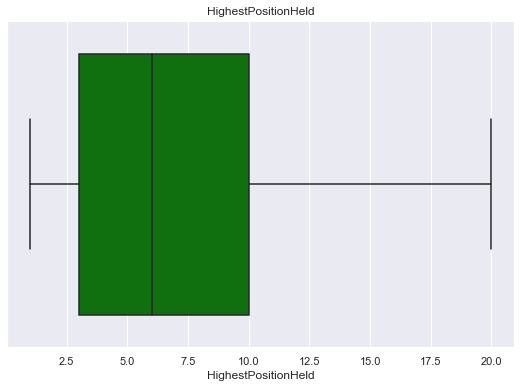

In [176]:
#teams perform

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title('HighestPositionHeld')
sns.distplot(mydf['HighestPositionHeld'],color='red')


plt.figure(figsize=(20,6))
plt.subplot(1, 2, 2)
plt.title('HighestPositionHeld')
sns.boxplot(mydf['HighestPositionHeld'],orient='vertical',color='green')

plt.show()

###  This analysis suggests how many teams performed well in atleast one tournament to read top positions

# 2.  Bivariate Analysis

In [177]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = mydf.corr()
corr.style.background_gradient(cmap='coolwarm')

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,HighestPositionHeld,LaunchYear,WinPercentage,defenceFactor
Tournament,1.000000,0.981258,0.998683,0.971749,0.989295,0.949350,0.974867,0.987781,0.589304,0.645924,-0.708002,-0.599166,0.819559,-0.474220
Score,0.981258,1.000000,0.979687,0.997232,0.958090,0.878780,0.996634,0.943801,0.715014,0.764819,-0.669215,-0.538542,0.877385,-0.492819
PlayedGames,0.998683,0.979687,1.000000,0.967486,0.993972,0.955925,0.969970,0.990020,0.575072,0.633101,-0.711065,-0.581243,0.813179,-0.493850
WonGames,0.971749,0.997232,0.967486,1.000000,0.939416,0.851436,0.999312,0.925745,0.752904,0.797849,-0.647819,-0.540421,0.884278,-0.474525
DrawnGames,0.989295,0.958090,0.993972,0.939416,1.000000,0.972786,0.942234,0.992479,0.503378,0.566021,-0.720248,-0.570175,0.774416,-0.508568
LostGames,0.949350,0.878780,0.955925,0.851436,0.972786,1.000000,0.857843,0.985041,0.324025,0.391645,-0.726172,-0.591571,0.665366,-0.464482
BasketScored,0.974867,0.996634,0.969970,0.999312,0.942234,0.857843,1.000000,0.931079,0.743847,0.791041,-0.648672,-0.550150,0.879124,-0.463062
BasketGiven,0.987781,0.943801,0.990020,0.925745,0.992479,0.985041,0.931079,1.000000,0.471618,0.533448,-0.727323,-0.608902,0.757279,-0.462741
TournamentChampion,0.589304,0.715014,0.575072,0.752904,0.503378,0.324025,0.743847,0.471618,1.000000,0.971533,-0.304307,-0.286768,0.765351,-0.305185
Runner-up,0.645924,0.764819,0.633101,0.797849,0.566021,0.391645,0.791041,0.533448,0.971533,1.000000,-0.359191,-0.317250,0.801247,-0.332588


### Like we saw earlier, Tournament, score, playedgames, wongame, drawngames, lostgames, basketscored, basketgiven, tournamentchampion, runner-up and win percentage are correlated.

# 3. Multivariate Regression and Scatter Plot

<Figure size 1440x432 with 0 Axes>

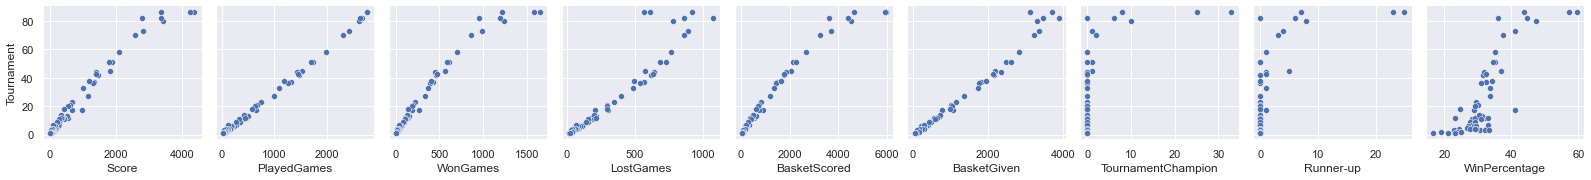

In [179]:
plt.figure(figsize=(20,6))
sns.pairplot(mydf, y_vars='Tournament', x_vars=["Score", "PlayedGames",'WonGames', 'LostGames','BasketScored','BasketGiven','TournamentChampion','Runner-up','WinPercentage'
                                                        ])
plt.show()

### Like all the above analysis suggest, more tournaments you play more you score, more you won games, more games to lose, more basket score or give, more chances to be in the final

In [49]:
#team that won championships most times
mydf.loc[mydf['TournamentChampion'].idxmax()]

Team                   Team 1
Tournament                 86
Score                    4385
PlayedGames              2762
WonGames                 1647
DrawnGames                552
LostGames                 563
BasketScored             5947
BasketGiven              3140
TournamentChampion         33
Runner-up                  23
TeamLaunch               1929
HighestPositionHeld         1
TeamName                    1
Name: 0, dtype: object

In [22]:
#team that scored most times
mydf.loc[mydf['Score'].idxmax()]

Team                   Team 1
Tournament                 86
Score                    4385
PlayedGames              2762
WonGames                 1647
DrawnGames                552
LostGames                 563
BasketScored             5947
BasketGiven              3140
TournamentChampion         33
Runner-up                  23
TeamLaunch               1929
HighestPositionHeld         1
TeamName                    1
Name: 0, dtype: object

In [24]:
#team that won most of the games
mydf.loc[mydf['WonGames'].idxmax()]

Team                   Team 1
Tournament                 86
Score                    4385
PlayedGames              2762
WonGames                 1647
DrawnGames                552
LostGames                 563
BasketScored             5947
BasketGiven              3140
TournamentChampion         33
Runner-up                  23
TeamLaunch               1929
HighestPositionHeld         1
TeamName                    1
Name: 0, dtype: object

In [26]:
#team that scored most baskets
mydf.loc[mydf['BasketScored'].idxmax()]

Team                   Team 1
Tournament                 86
Score                    4385
PlayedGames              2762
WonGames                 1647
DrawnGames                552
LostGames                 563
BasketScored             5947
BasketGiven              3140
TournamentChampion         33
Runner-up                  23
TeamLaunch               1929
HighestPositionHeld         1
TeamName                    1
Name: 0, dtype: object

In [28]:
#team that lost most of the finals
mydf.loc[mydf['Runner-up'].idxmax()]

Team                   Team 2
Tournament                 86
Score                    4262
PlayedGames              2762
WonGames                 1581
DrawnGames                573
LostGames                 608
BasketScored             5900
BasketGiven              3114
TournamentChampion         25
Runner-up                  25
TeamLaunch               1929
HighestPositionHeld         1
TeamName                    2
Name: 1, dtype: object

In [57]:
mydf.sort_values(by=['WinPercentage'], ascending=False).head(10)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,TeamName,WinPercentage
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,1,59.630702
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,2,57.241130
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,3,47.475134
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,4,44.557057
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,5,43.772629
20,Team 21,17,970,646,266,172,208,892,789,0,1,1998,2,21,41.176471
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,6,41.112957
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,8,37.532580
10,Team 11,45,1814,1530,563,392,575,2052,2188,1,5,1941,1,11,36.797386
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3,7,36.100533


In [58]:
#team with highest winning %
mydf.loc[mydf['WinPercentage'].idxmax()]

Team                    Team 1
Tournament                  86
Score                     4385
PlayedGames               2762
WonGames                  1647
DrawnGames                 552
LostGames                  563
BasketScored              5947
BasketGiven               3140
TournamentChampion          33
Runner-up                   23
TeamLaunch                1929
HighestPositionHeld          1
TeamName                     1
WinPercentage          59.6307
Name: 0, dtype: object

In [59]:
#defence record of each team
defence = mydf['BasketGiven']/mydf['PlayedGames']
mydf['defenceFactor'] = defence

c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
#team with best defence record
mydf[mydf['defenceFactor']==mydf['defenceFactor'].min()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,TeamName,WinPercentage,defenceFactor
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,2,57.24113,1.127444


In [63]:
mydf.sort_values(by=['defenceFactor']).head(10)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,TeamName,WinPercentage,defenceFactor
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,2,57.241130,1.127444
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,1,59.630702,1.136857
45,Team 46,3,96,114,26,44,44,101,139,0,0,1990,9,46,22.807018,1.219298
20,Team 21,17,970,646,266,172,208,892,789,0,1,1998,2,21,41.176471,1.221362
41,Team 42,6,150,180,53,44,83,165,221,0,0,1963,7,42,29.444444,1.227778
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,3,47.475134,1.265876
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,4,44.557057,1.302177
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,5,43.772629,1.339609
30,Team 31,12,375,423,123,102,198,422,581,0,0,1974,7,31,29.078014,1.373522
18,Team 19,27,1148,988,333,256,399,1182,1371,0,0,1960,3,19,33.704453,1.387652


### As expected top teams have good defence record but teams like Team 20, Team 46, Team 42 have good defence but 42 and 46 haven't played much. Team 20 looks new and have played enough. Team 20 is also have good winning %.

c:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


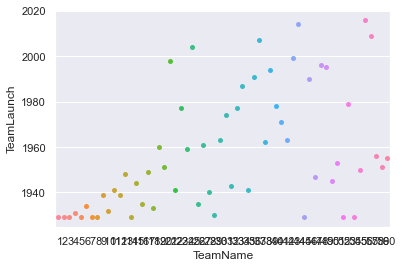

In [95]:
g = sns.swarmplot(mydf['TeamName'], mydf['TeamLaunch']);

In [72]:
mydf.sort_values(by=['Tournament'], ascending=False).head(10)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,TeamName,WinPercentage,defenceFactor
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,1,59.630702,1.136857
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,5,43.772629,1.339609
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,2,57.241130,1.127444
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,4,44.557057,1.302177
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3,7,36.100533,1.480960
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,3,47.475134,1.265876
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,6,41.112957,1.400748
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,8,37.532580,1.403128
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2,9,35.146022,1.433535
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1,10,35.069444,1.442130


In [73]:
mydf.sort_values(by=['Score'], ascending=False).head(10)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,TeamName,WinPercentage,defenceFactor
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,1,59.630702,1.136857
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,2,57.241130,1.127444
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,3,47.475134,1.265876
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,4,44.557057,1.302177
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,5,43.772629,1.339609
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,6,41.112957,1.400748
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3,7,36.100533,1.480960
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,8,37.532580,1.403128
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2,9,35.146022,1.433535
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1,10,35.069444,1.442130


In [74]:
mydf.sort_values(by=['PlayedGames'], ascending=False).head(10)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,TeamName,WinPercentage,defenceFactor
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,1,59.630702,1.136857
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,2,57.241130,1.127444
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,5,43.772629,1.339609
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,4,44.557057,1.302177
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3,7,36.100533,1.480960
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,3,47.475134,1.265876
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,6,41.112957,1.400748
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,8,37.532580,1.403128
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2,9,35.146022,1.433535
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1,10,35.069444,1.442130


In [75]:
mydf.sort_values(by=['WonGames'], ascending=False).head(10)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,TeamName,WinPercentage,defenceFactor
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,1,59.630702,1.136857
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,2,57.241130,1.127444
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,3,47.475134,1.265876
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,5,43.772629,1.339609
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,4,44.557057,1.302177
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,6,41.112957,1.400748
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3,7,36.100533,1.480960
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,8,37.532580,1.403128
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2,9,35.146022,1.433535
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1,10,35.069444,1.442130


In [78]:
mydf.sort_values(by=['BasketScored'], ascending=False).head(10)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,TeamName,WinPercentage,defenceFactor
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,1,59.630702,1.136857
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,2,57.241130,1.127444
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,5,43.772629,1.339609
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,3,47.475134,1.265876
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,4,44.557057,1.302177
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,6,41.112957,1.400748
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3,7,36.100533,1.480960
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,8,37.532580,1.403128
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2,9,35.146022,1.433535
11,Team 12,51,1789,1698,586,389,723,2278,2624,0,0,1939,4,12,34.511190,1.545347


In [87]:
#10 newst teams
newdf = mydf.sort_values(by=['TeamLaunch'], ascending=False).head(10)
newdf.sort_values(by=['WinPercentage'], ascending=False).head(10)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,TeamName,WinPercentage,defenceFactor
20,Team 21,17,970,646,266,172,208,892,789,0,1,1998,2,21,41.176471,1.221362
38,Team 39,4,190,160,52,45,63,199,241,0,0,1994,10,39,32.500000,1.506250
24,Team 25,12,553,456,147,112,197,520,633,0,0,2004,6,25,32.236842,1.388158
43,Team 44,3,132,114,35,27,52,139,167,0,0,2014,10,44,30.701754,1.464912
36,Team 37,6,242,228,62,56,110,244,366,0,0,2007,8,37,27.192982,1.605263
47,Team 48,2,83,80,20,23,37,62,117,0,0,1996,17,48,25.000000,1.462500
42,Team 43,4,148,152,37,37,78,155,253,0,0,1999,17,43,24.342105,1.664474
48,Team 49,2,81,80,19,24,37,70,115,0,0,1995,19,49,23.750000,1.437500
55,Team 56,1,35,38,8,11,19,36,55,0,0,2016,17,56,21.052632,1.447368
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009,20,57,21.052632,1.736842


### These top 10 newest teams. It seems new teams have not reach the performing level as the oldest teams have. None of these teams have reached finals except Team 20. Team 20 is performing way better than other 9 teams. Win% of Team 20 are on very higher side

In [180]:
newdf.sort_values(by=['defenceFactor']).head(10)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,TeamName,WinPercentage,defenceFactor
20,Team 21,17,970,646,266,172,208,892,789,0,1,1998,2,21,41.176471,1.221362
24,Team 25,12,553,456,147,112,197,520,633,0,0,2004,6,25,32.236842,1.388158
48,Team 49,2,81,80,19,24,37,70,115,0,0,1995,19,49,23.750000,1.437500
55,Team 56,1,35,38,8,11,19,36,55,0,0,2016,17,56,21.052632,1.447368
47,Team 48,2,83,80,20,23,37,62,117,0,0,1996,17,48,25.000000,1.462500
43,Team 44,3,132,114,35,27,52,139,167,0,0,2014,10,44,30.701754,1.464912
38,Team 39,4,190,160,52,45,63,199,241,0,0,1994,10,39,32.500000,1.506250
36,Team 37,6,242,228,62,56,110,244,366,0,0,2007,8,37,27.192982,1.605263
42,Team 43,4,148,152,37,37,78,155,253,0,0,1999,17,43,24.342105,1.664474
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009,20,57,21.052632,1.736842


### Defence factor of Team 20 is also the highest amongst the top 10 new teams and seems greates performing team amongst that group

In [181]:
#10 oldest teams
olddf = mydf.sort_values(by=['TeamLaunch']).head(15)
olddf = olddf[olddf['Tournament']> 50]
olddf.sort_values(by=['WinPercentage'], ascending=False).head(10)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,LaunchYear,TeamName,WinPercentage,defenceFactor
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,1929,1,59.630702,1.136857
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,1929,2,57.241130,1.127444
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,1929,3,47.475134,1.265876
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1,1931,4,44.557057,1.302177
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,1929,5,43.772629,1.339609
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934-35,1,1934,6,41.112957,1.400748
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,1929,8,37.532580,1.403128
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3,1929,7,36.100533,1.480960
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932-33,1,1932,10,35.069444,1.442130


In [182]:
olddf.sort_values(by=['defenceFactor']).head(10)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,LaunchYear,TeamName,WinPercentage,defenceFactor
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,1929,2,57.241130,1.127444
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,1929,1,59.630702,1.136857
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,1929,3,47.475134,1.265876
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1,1931,4,44.557057,1.302177
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,1929,5,43.772629,1.339609
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934-35,1,1934,6,41.112957,1.400748
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,1929,8,37.532580,1.403128
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932-33,1,1932,10,35.069444,1.442130
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3,1929,7,36.100533,1.480960


### Top 10 Oldest teams who played more than 50 tournaments are performing well. Almost all of the following won the tournament atleast once except Team 7. Considering the 82 tournaments played, Team 7 never reached final and their win% is also on lower side. Defence factor of Team 7 is also the lowest amongst the top 10 old teams who have played more than 50 tournaments and seems worst performing team amongst that group

In [183]:
mydf['BasketScored']-mydf['Score']

0     1562
1     1638
2     1092
3     1012
4     1263
5      861
6      817
7      655
8      574
9      275
10     238
11     489
12     296
13     427
14     364
15     149
16     107
17     468
18      34
19     327
20     -78
21     152
22      98
23     144
24     -33
25     178
26     109
27     162
28      37
29      14
30      47
31     139
32      50
33      -2
34     134
35      43
36       2
37      55
38       9
39      14
40      48
41      15
42       7
43       7
44     120
45       5
46      90
47     -21
48     -11
49      69
50      50
51      97
52      19
53      55
54      30
55       1
56       4
57      15
58      32
59      20
dtype: int32

### Dataset looks faulty as it says DrawnGames. Basketball games can't be drawn.

### Looking at data, it seems data is faulty. Logically score should be higher than the baskets scored. But from following analysis it seems for few teams data is faulty where Basket scored are more than the score itself

### Team launch year could have been restricted to one year other than dividing between 2 like (1930-1931). 

### Data types of  all attributes were wrong except for Team and TeamLaunch. It should have been numeric for other attributes.